In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv("C:\\Users\\pc\\Desktop\\Katarina_statistika_python\\Train.csv")
# Uklanjanje Nan vrijednosti iz skupa
df=df.dropna() 
# U skupu nije bilo nedostajućih (NULL) vrednosti, pa dropna() nije uklonio ništa iz skupa.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## LINK OD SKUPA https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download

## Deskriptivna statistika

In [3]:
# Pregled broja ispitanika i varijabli u skupu

broj_redova=len(df)
print("broj redova skupa je:",broj_redova)
redovi, kolone=df.shape
print("Skup ima", redovi, "telefona i", kolone, "varijablu.")

broj redova skupa je: 2000
Skup ima 2000 telefona i 21 varijablu.


In [4]:
# Ovaj skup podataka sadrži informacije za 2000 mobilnih telefona.
# Imamo 21 promenljivu uključujući 20 nezavisnih promenljivih i 1 zavisnu promenljivu koja je raspon_cena
# Imamo 8 kategoričkih varijabli: n_cores, price_range, blue, dual_sim, four_g, three_g, touch_screen, vifi
# Imamo 13 numeričkih varijabli: baterija_pover, clock_speed, fc, int_memori, m_dep, mobile_vt, pc, pk_height, pk_vidth, ram, talk_time, sc_h, sc_v

In [5]:
df.describe().T
# Ova metoda generiše osnovne statističke informacije o numeričkim kolonama DataFrame-a. To uključuje broj, srednju vrednost, standardnu devijaciju, minimum, kvartile, i maksimum.
# .T: Ovo je atribut koji se koristi za transponovanje, što znači da će se redovi pretvoriti u kolone, a kolone u redove. To menja orijentaciju podataka u DataFrame-u.

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
# Tipovi podataka za svaku kolonu
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
# U kontekstu širine ekrana i visine mobilnog uređaja, vrednost 0 može biti neprirodna i signalizirati potencijalnu grešku ili nedostatak podataka, zato se uklanjaju iz skupa
df = df.loc[~(df['sc_w'] == 0)]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1820.0,1237.843956,439.940961,501.0,845.50,1230.5,1611.00,1998.0
blue,1820.0,0.503846,0.500123,0.0,0.00,1.0,1.00,1.0
clock_speed,1820.0,1.519670,0.813829,0.5,0.70,1.5,2.20,3.0
dual_sim,1820.0,0.504396,0.500118,0.0,0.00,1.0,1.00,1.0
fc,1820.0,4.319231,4.354894,0.0,1.00,3.0,7.00,19.0
four_g,1820.0,0.524725,0.499526,0.0,0.00,1.0,1.00,1.0
int_memory,1820.0,32.139560,18.114542,2.0,16.00,32.0,48.00,64.0
m_dep,1820.0,0.499890,0.288805,0.1,0.20,0.5,0.80,1.0
mobile_wt,1820.0,140.585714,35.428886,80.0,109.00,141.5,170.25,200.0
n_cores,1820.0,4.532967,2.289520,1.0,3.00,5.0,7.00,8.0


clock_speed
0.5    375
2.8     74
2.3     72
1.6     70
2.1     69
1.4     68
2.5     68
0.6     68
1.3     64
2.0     62
0.7     62
1.5     60
1.9     59
1.8     58
1.0     55
2.9     55
0.9     54
2.2     54
1.7     53
2.4     53
2.6     51
0.8     50
1.2     49
2.7     48
1.1     43
3.0     26
Name: count, dtype: int64


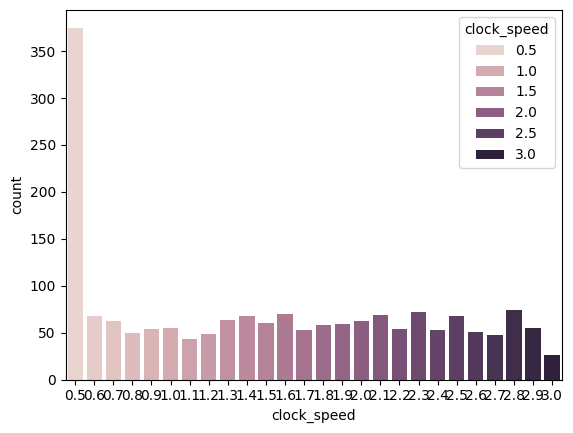

In [10]:
# counts = df_train['clock_speed'].value_counts(): Broji koliko puta se svaka jedinstvena vrednost pojavljuje u koloni "clock_speed" i smešta rezultat u promenljivu counts.
# print(counts): Ispisuje rezultat brojanja, što pruža pregled brojača za svaku jedinstvenu vrednost u "clock_speed".
# sns.countplot(x="clock_speed", data=df_train): Koristi Seaborn za kreiranje bar grafikona koji prikazuje broj pojavljivanja svake jedinstvene vrednosti u "clock_speed". Ova vizualizacija pomaže u sagledavanju raspodele vrednosti u toj koloni.

counts = df['clock_speed'].value_counts()
print(counts)
sns.countplot(x="clock_speed", data=df)
sns.countplot(x="clock_speed", data=df, hue="clock_speed")
plt.show()

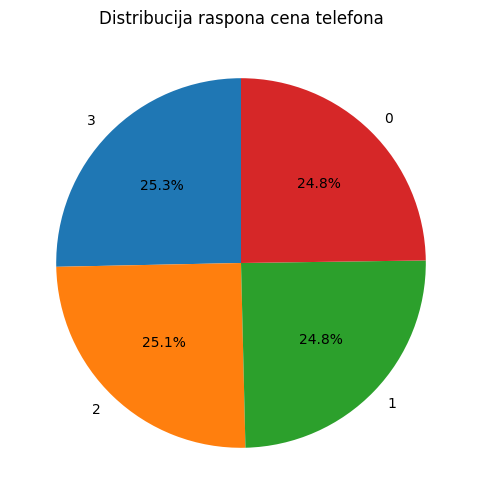

In [11]:
plt.figure(figsize=(6,6))
plt.pie(df.price_range.value_counts(), labels=df.price_range.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribucija raspona cena telefona')
plt.show()

talk_time
7     117
4     114
15    107
16    104
19    102
6     101
11     98
8      96
20     93
10     93
9      93
13     92
17     91
18     90
14     90
3      88
2      86
12     84
5      81
Name: count, dtype: int64


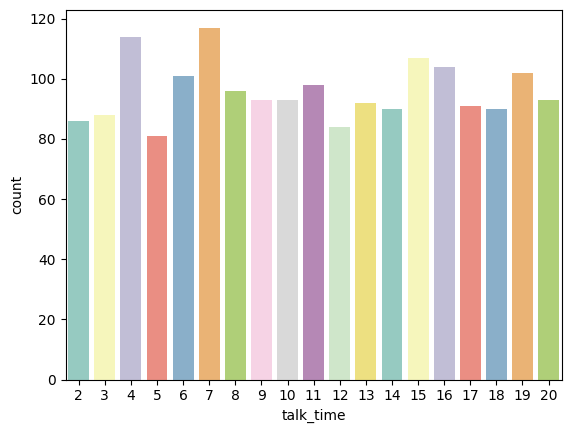

In [12]:
counts = df['talk_time'].value_counts()
print(counts)
sns.countplot(x="talk_time", data=df)
sns.countplot(x="talk_time", hue="talk_time", data=df, palette="Set3", legend=False)
plt.show()

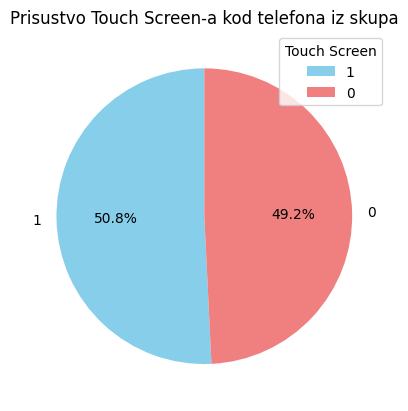

In [13]:
# Grafikon: Zastupljenost touch screen-a kod telefona iz skupa

# Prebrojavanje vrednosti u koloni "touch_screen"
touch_screen_counts = df['touch_screen'].value_counts()

# Kreiranje pie chart-a
plt.pie(touch_screen_counts, labels=touch_screen_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Dodavanje legendi
plt.legend(title="Touch Screen", loc="upper right")

# Prikazivanje grafikona
plt.title("Prisustvo Touch Screen-a kod telefona iz skupa")
plt.show()

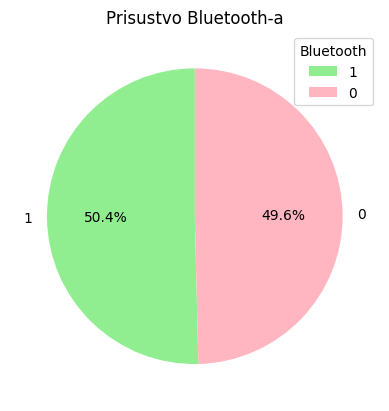

In [14]:
# Grafikon: Zastupljenost Bluetooth-a kod telefona iz skupa

# Prebrojavanje vrednosti u koloni "blue"
bluetooth_counts = df['blue'].value_counts()

# Kreiranje pie chart-a
plt.pie(bluetooth_counts, labels=bluetooth_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightpink'])

# Dodavanje legende
plt.legend(title="Bluetooth", loc="upper right")

# Prikazivanje grafikona
plt.title("Prisustvo Bluetooth-a")
plt.show()

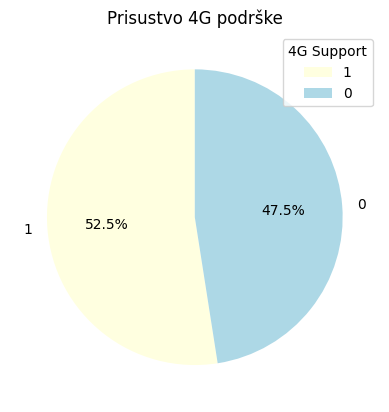

In [15]:
# Grafikon: Zastupljenost 4G podrške kod telefona iz skupa

# Prebrojavanje vrednosti u koloni "four_g"
four_g_counts = df['four_g'].value_counts()

# Kreiranje pie chart-a sa nježnim žutim i plavim bojama
plt.pie(four_g_counts, labels=four_g_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightyellow', 'lightblue'])

# Dodavanje legende
plt.legend(title="4G Support", loc="upper right")

# Prikazivanje grafikona
plt.title("Prisustvo 4G podrške")
plt.show()

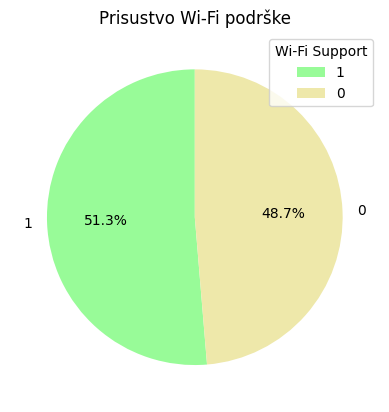

In [16]:
# Grafikon: Zastupljenost WIFI podrške kod telefona iz skupa

# Prebrojavanje vrednosti u koloni "wifi"
wifi_counts = df['wifi'].value_counts()

# Kreiranje pie chart-a
plt.pie(wifi_counts, labels=wifi_counts.index, autopct='%1.1f%%', startangle=90, colors=['PaleGreen', 'PaleGoldenRod'])  

# Dodavanje legende
plt.legend(title="Wi-Fi Support", loc="upper right")

# Prikazivanje grafikona
plt.title("Prisustvo Wi-Fi podrške")
plt.show()

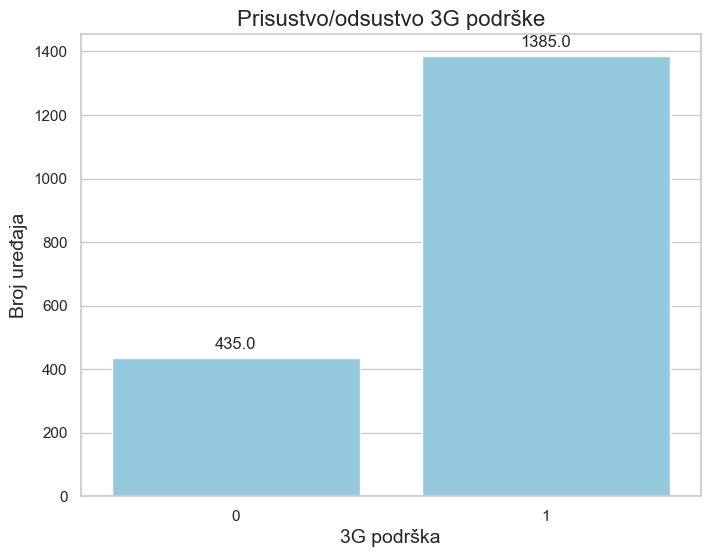

In [17]:
# Prebrojavanje vrednosti u koloni "three_g"
three_g_counts = df['three_g'].value_counts()

# Postavljanje stila Seaborn za lepši izgled
sns.set(style="whitegrid")

# Kreiranje bar grafikona 
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=three_g_counts.index, y=three_g_counts, color="skyblue")

# Dodavanje vrednosti iznad stubića
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Postavljanje naslova i oznaka na osama
plt.title("Prisustvo/odsustvo 3G podrške", fontsize=16)
plt.xlabel("3G podrška", fontsize=14)
plt.ylabel("Broj uređaja", fontsize=14)

# Prikazivanje grafikona
plt.show()

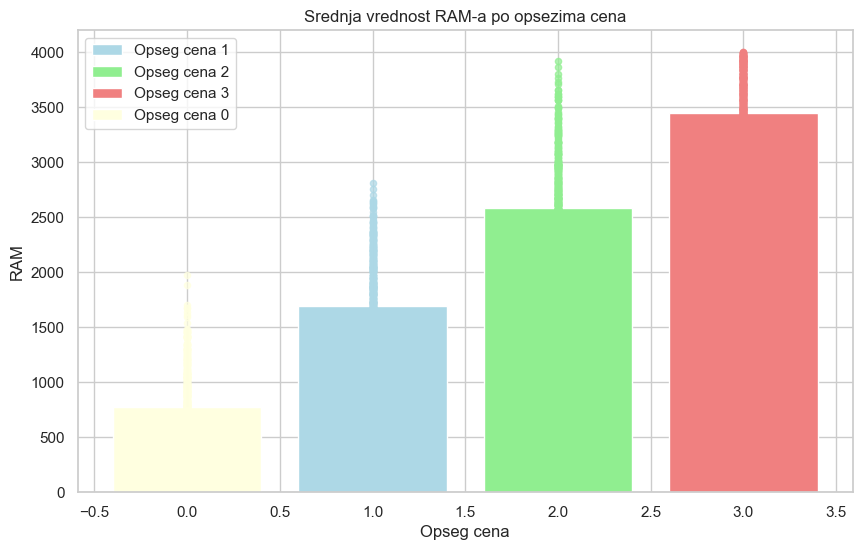

In [18]:
# Odabir promenljivih za prikaz
x_variable = 'price_range'
y_variable = 'ram'

# Prikaz kombinacije bar i scatter grafikona sa bojama
fig, ax = plt.subplots(figsize=(10, 6))

for price_range, color in zip(df[x_variable].unique(), ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']):
    subset = df[df[x_variable] == price_range]
    ax.bar(price_range, subset[y_variable].mean(), color=color, label=f'Opseg cena {price_range}')
    ax.scatter([price_range] * len(subset), subset[y_variable], color=color, alpha=0.7, s=20)

ax.set_xlabel('Opseg cena')
ax.set_ylabel('RAM')
ax.set_title(f'Srednja vrednost RAM-a po opsezima cena')
ax.legend()
plt.show()

# Ovaj grafikon omogućava istovremeni prikaz srednje vrednosti i raspršenosti podataka za atribut 'ram' u okviru različitih opsega cena. 
# Ako trake za određeni opseg cena imaju veće visine, to znači da su srednje vrednosti 'ram' više u tom opsegu. Scatter tačke pomažu u sagledavanju varijacije podataka u svakom opsegu.

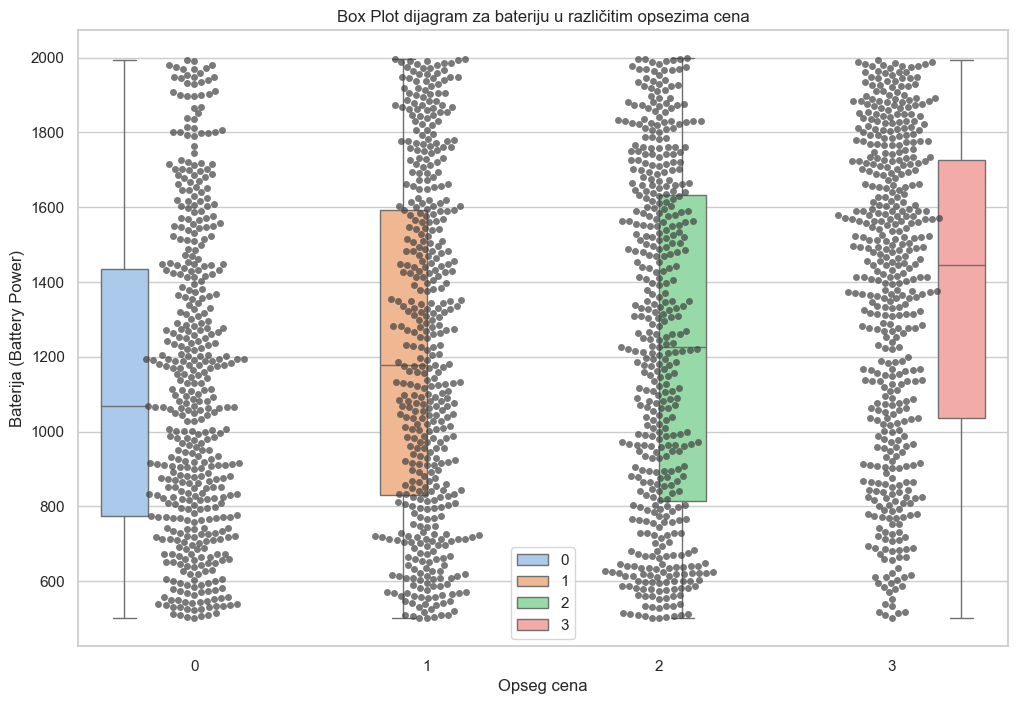

In [19]:
# Odabir relevantnih atributa
selected_attributes = ['battery_power', 'price_range']
df_selected = df[selected_attributes]

# Prikaz box plot dijagrama
plt.figure(figsize=(12, 8))

# Korišćenje seaborn za poboljšanje izgleda boxplota
sns.boxplot(x='price_range', y='battery_power', data=df_selected, palette='pastel', hue='price_range', dodge=True)
sns.swarmplot(x='price_range', y='battery_power', data=df_selected, color='0.25', dodge=True, alpha=0.7)

# Dodavanje oznaka i naslova
plt.xlabel('Opseg cena')
plt.ylabel('Baterija (Battery Power)')
plt.title('Box Plot dijagram za bateriju u različitim opsezima cena')

plt.show()
#Tačke na dijagramu: Prikazuju pojedinačne podatke (vrednosti 'battery_power') za svaki opseg cene. Swarm plot je koristan da bi se videla distribucija podataka.

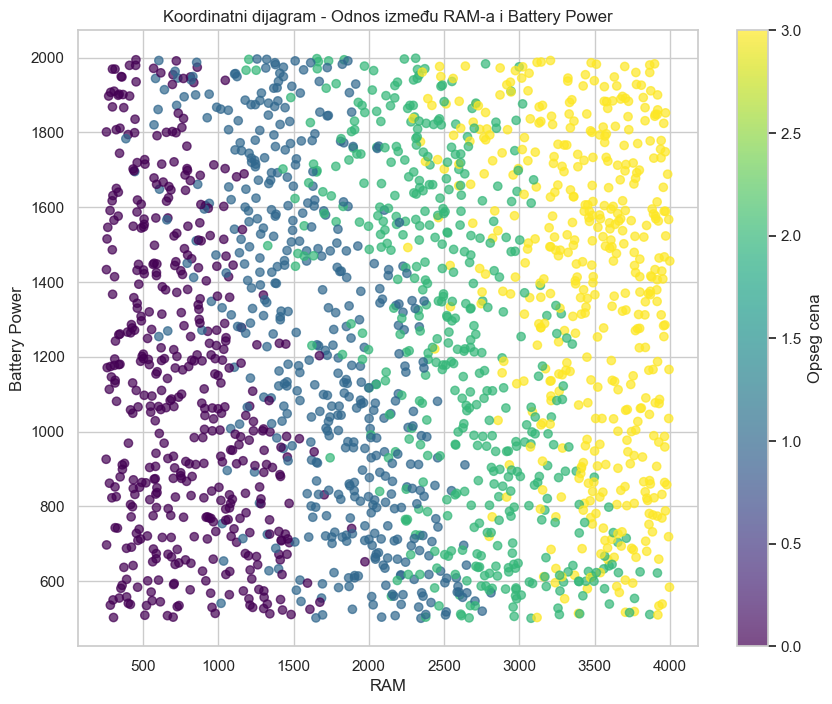

In [20]:
# Prikaz koordinatnog dijagrama za odnos između 'ram' i 'battery_power'
plt.figure(figsize=(10, 8))
plt.scatter(df['ram'], df['battery_power'], alpha=0.7, c=df['price_range'], cmap='viridis')
plt.colorbar(label='Opseg cena')
plt.title('Koordinatni dijagram - Odnos između RAM-a i Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')

plt.show()
#Boje tačaka označavaju opseg cena, pri čemu se svaka boja odnosi na određeni opseg cena.

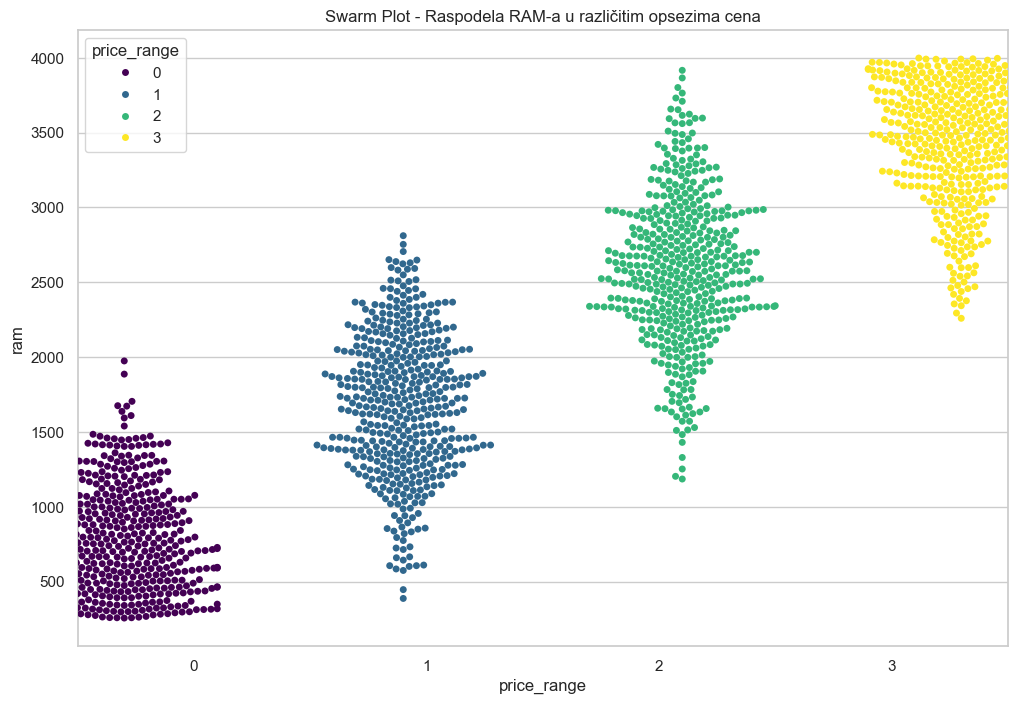

In [21]:
# Prikaz swarm plot-a za raspodelu 'ram' u različitim opsezima cena
plt.figure(figsize=(12, 8))
sns.swarmplot(x='price_range', y='ram', data=df, hue='price_range', palette='viridis', dodge=True)
plt.title('Swarm Plot - Raspodela RAM-a u različitim opsezima cena')

plt.show()

## Korelaciona analiza

In [22]:
# Izračunavanje korelacije između određenih varijabli
selected_columns = ['battery_power', 'ram', 'px_height', 'sc_h', 'price_range', 'fc', 'pc', 'four_g', 'three_g']
correlation_matrix = df[selected_columns].corr()

# Prikazivanje rezultata
print(correlation_matrix)

               battery_power       ram  px_height      sc_h  price_range  \
battery_power       1.000000 -0.005942   0.015521 -0.044839     0.194030   
ram                -0.005942  1.000000  -0.020243  0.016093     0.917026   
px_height           0.015521 -0.020243   1.000000  0.061542     0.150052   
sc_h               -0.044839  0.016093   0.061542  1.000000     0.024488   
price_range         0.194030  0.917026   0.150052  0.024488     1.000000   
fc                  0.027197  0.011890  -0.001315 -0.012276     0.017603   
pc                  0.025003  0.022290  -0.021054  0.000087     0.023218   
four_g              0.018697  0.009220  -0.021578  0.029355     0.014336   
three_g             0.006717  0.015075  -0.030450  0.018335     0.016767   

                     fc        pc    four_g   three_g  
battery_power  0.027197  0.025003  0.018697  0.006717  
ram            0.011890  0.022290  0.009220  0.015075  
px_height     -0.001315 -0.021054 -0.021578 -0.030450  
sc_h          -

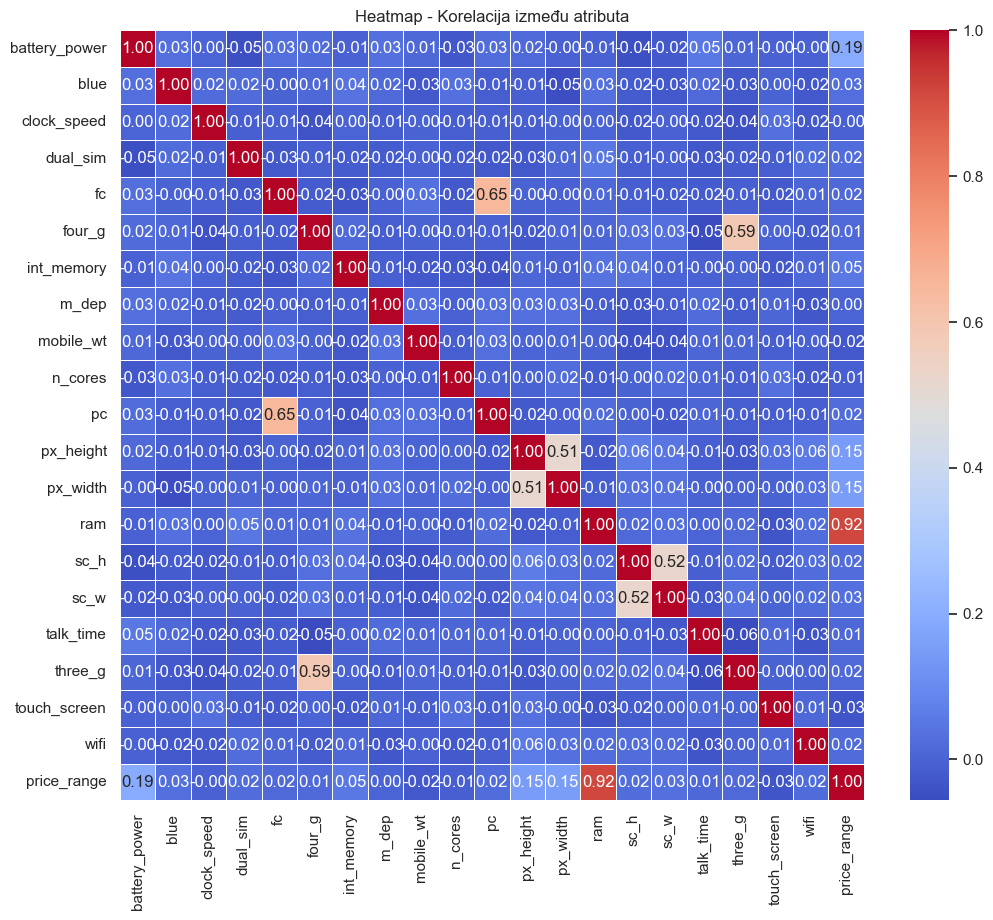

In [23]:
# Izračunavanje matrice korelacije
correlation_matrix = df.corr()

# Prikaz heatmap-a za korelaciju atributa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap - Korelacija između atributa')

plt.show()

# ram i price_range imaju jaku pozitivnu korelaciju od 0.92, što ukazuje da veći RAM obično ide ruku pod ruku s višim cenama telefona (price_range).
# Korelacija između four_g i three_g iznosi 0.59, što ukazuje na umjerenu pozitivnu korelaciju.
# battery_power i price_range imaju pozitivnu korelaciju od 0.19, što ukazuje na neki stepen veze između kapaciteta baterije i cenovnog opsega telefona.

## Stratifikovani slučajni uzorak

In [24]:
# Podaci u skupu se dele na stratume prema rangu cene:
#1. STRATUM Niska cena (0)
#2. STRATUM Srednja niska cena (1)
#3. STRATUM Srednja visoka cena (2)
#4. STRATUM Visoka cena (3)


## Proporcionalno uzorkovanje

In [27]:
# Prikaz broja telefona prema stratumima (price_range)
df=pd.read_csv("C:\\Users\\pc\\Desktop\\Katarina_statistika_python\\Train.csv")

# Veličina populacije
N = len(df)
print("Populacija ima", N, "jedinica.")

# Iz skupa isključujemo gde je širina ekrana 0
df = df.query('sc_w != 0')
N = len(df)
print("Populacija nakon isključenja telefona koji imaju širinu ekrana 0 ima", N, "jedinica.")

# Prikaz različitih vrednosti u koloni "price_range"
razlicite_vrednosti = df['price_range'].unique()
print("Različite vrednosti u koloni price_range:", razlicite_vrednosti)

# Izmjena naziva vrednosti price_range kolone
df['price_range'] = df['price_range'].astype(str) # prvo pretvaranje u tekstualni tip podatka
df.loc[df['price_range'] == "0", 'price_range'] = 'niska_cena'
df.loc[df['price_range'] == "1", 'price_range'] = 'srednja_niska_cena'
df.loc[df['price_range'] == "2", 'price_range'] = 'srednja_visoka_cena'
df.loc[df['price_range'] == "3", 'price_range'] = 'visoka_cena'

Populacija ima 2000 jedinica.
Populacija nakon isključenja telefona koji imaju širinu ekrana 0 ima 1820 jedinica.
Različite vrednosti u koloni price_range: [1 2 3 0]


In [28]:
# Računanje procentualnog učešća različitih vrednosti price_range kolone
broj_jedinica_po_stratumima = df['price_range'].value_counts()
print("Broj jedinica po različitim stratumima:", broj_jedinica_po_stratumima)
print("\n") # prazan red

# Broj jedinica po stratumima izdvojen u varijable iz broj_jedinica_po_stratumima
ukupno_telefona_niska_cena =  broj_jedinica_po_stratumima["niska_cena"]
ukupno_telefona_srednja_niska_cena =  broj_jedinica_po_stratumima["srednja_niska_cena"]
ukupno_telefona_srednja_visoka_cena =  broj_jedinica_po_stratumima["srednja_visoka_cena"]
ukupno_telefona_visoka_cena =  broj_jedinica_po_stratumima["visoka_cena"]

print("Ukupno telefona niska_cena:", ukupno_telefona_niska_cena)
print("Ukupno telefona srednja_niska_cena:", ukupno_telefona_srednja_niska_cena)
print("Ukupno telefona srednja_visoka_cena:", ukupno_telefona_srednja_visoka_cena)
print("Ukupno telefona visoka_cena:", ukupno_telefona_visoka_cena)

# Udio svakog stratuma u populaciji
niska_cena_udio = round(ukupno_telefona_niska_cena/N,2)
srednja_niska_cena_udio = round(ukupno_telefona_srednja_niska_cena/N,2)
srednja_visoka_cena_udio = round(ukupno_telefona_srednja_visoka_cena/N,2)
visoka_cena_udio = round(ukupno_telefona_visoka_cena/N,2)

print("\n")
print("Udio niska_cena u populaciji:",niska_cena_udio)
print("Udio srednja_niska_cena u populaciji:",srednja_niska_cena_udio)
print("Udio srednja_visoka_cena u populaciji:",srednja_visoka_cena_udio)
print("Udio visoka_cena u populaciji:",visoka_cena_udio)

print("Ukupno", niska_cena_udio + srednja_niska_cena_udio + srednja_visoka_cena_udio + visoka_cena_udio)
print("\n")

Broj jedinica po različitim stratumima: price_range
visoka_cena            461
srednja_visoka_cena    456
srednja_niska_cena     452
niska_cena             451
Name: count, dtype: int64


Ukupno telefona niska_cena: 451
Ukupno telefona srednja_niska_cena: 452
Ukupno telefona srednja_visoka_cena: 456
Ukupno telefona visoka_cena: 461


Udio niska_cena u populaciji: 0.25
Udio srednja_niska_cena u populaciji: 0.25
Udio srednja_visoka_cena u populaciji: 0.25
Udio visoka_cena u populaciji: 0.25
Ukupno 1.0




In [29]:
# Računanje broja jedinica svakog stratuma u uzorku
n = 100

broj_jedinica_niska_cena_u_uzorku = round(n * niska_cena_udio)
print("Broj jedinica stratuma niska_cena u uzorku:", broj_jedinica_niska_cena_u_uzorku)

broj_jedinica_srednja_niska_cena_u_uzorku = round(n * srednja_niska_cena_udio)
print("Broj jedinica stratuma srednja_niska_cena u uzorku:", broj_jedinica_srednja_niska_cena_u_uzorku)

broj_jedinica_srednja_visoka_cena_u_uzorku = round(n * srednja_visoka_cena_udio)
print("Broj jedinica stratuma srednja_visoka_cena_udio u uzorku:", broj_jedinica_srednja_visoka_cena_u_uzorku)

broj_jedinica_visoka_cena_u_uzorku = round(n * visoka_cena_udio)
print("Broj jedinica stratuma visoka_cena u uzorku:", broj_jedinica_visoka_cena_u_uzorku)

Broj jedinica stratuma niska_cena u uzorku: 25
Broj jedinica stratuma srednja_niska_cena u uzorku: 25
Broj jedinica stratuma srednja_visoka_cena_udio u uzorku: 25
Broj jedinica stratuma visoka_cena u uzorku: 25


In [35]:
# Formiranje stratuma iz populacije 

df_niska_cena_stratum = df[df['price_range'] == "niska_cena"] # iz populacije izvlači samo one sa niskom cenom 
df_srednja_niska_cena_stratum = df[df['price_range'] == "srednja_niska_cena"] 
df_srednja_visoka_cena_stratum = df[df['price_range'] == "srednja_visoka_cena"] 
df_visoka_cena_stratum = df[df['price_range'] == "visoka_cena"] 

df_niska_cena_stratum.head() # Primer stratuma niska_cena

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,niska_cena
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,niska_cena
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,niska_cena
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,niska_cena
15,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,niska_cena


In [36]:
# Uzimanje slučajnih jedinica iz svakog pojedinačnog stratuma

df_slucajni_uzorak_niska_cena = df_niska_cena_stratum.sample(n=broj_jedinica_niska_cena_u_uzorku)  
df_slucajni_uzorak_srednja_niska_cena = df_srednja_niska_cena_stratum.sample(n=broj_jedinica_srednja_niska_cena_u_uzorku)  
df_slucajni_uzorak_srednja_visoka_cena = df_srednja_visoka_cena_stratum.sample(n=broj_jedinica_srednja_visoka_cena_u_uzorku)  
df_slucajni_uzorak_visoka_cena = df_visoka_cena_stratum.sample(n=broj_jedinica_visoka_cena_u_uzorku)  

df_uzorak = pd.concat([df_slucajni_uzorak_niska_cena, df_slucajni_uzorak_srednja_niska_cena, df_slucajni_uzorak_srednja_visoka_cena, df_slucajni_uzorak_visoka_cena], ignore_index=True)
# ignore_index=True - ovo znači ponovno postavljanje indexa

pd.set_option('display.max_rows', None)
display(df_uzorak)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1278,1,0.5,1,1,0,54,0.1,104,8,...,581,750,1155,7,1,20,0,0,1,niska_cena
1,950,1,0.5,0,9,0,55,0.1,156,5,...,774,843,1095,14,12,13,0,1,0,niska_cena
2,1685,0,0.6,0,14,0,16,0.6,137,7,...,120,1429,881,6,3,17,0,1,1,niska_cena
3,720,1,0.9,1,12,1,14,0.8,165,4,...,366,1234,1086,14,7,3,1,1,0,niska_cena
4,541,1,2.3,0,4,0,51,0.4,200,8,...,1012,1226,403,11,2,12,0,0,0,niska_cena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1948,0,2.8,1,8,0,16,0.1,100,5,...,631,1940,3630,9,7,17,0,1,0,visoka_cena
96,519,1,1.6,1,7,1,51,0.3,132,4,...,550,645,3763,16,1,4,1,0,1,visoka_cena
97,1053,1,0.8,1,7,1,45,0.3,103,1,...,594,1767,3086,17,6,5,1,1,1,visoka_cena
98,917,1,0.5,0,1,1,31,0.5,88,6,...,423,909,3424,19,2,13,1,1,0,visoka_cena


## Proporcionalno uzorkovanje - način 2

In [44]:
df.groupby('price_range', group_keys=False).apply(lambda x: x.sample(frac=0.3))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1715,1969,0,0.8,1,5,1,7,0.2,85,8,...,332,764,315,16,7,7,1,1,0,niska_cena
1416,1448,0,0.5,1,18,0,2,0.2,100,5,...,846,1144,593,9,4,18,1,1,1,niska_cena
1093,1403,1,2.5,1,3,0,62,0.9,90,4,...,217,1623,921,14,13,18,1,0,0,niska_cena
1513,1343,0,2.4,1,5,1,14,0.9,81,8,...,1063,1205,462,18,7,11,1,1,1,niska_cena
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,172,812,776,7,6,8,0,0,0,niska_cena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,1825,0,1.1,1,13,1,17,0.1,157,4,...,1621,1773,3130,12,4,2,1,0,1,visoka_cena
714,1188,1,1.4,1,0,1,9,0.6,114,2,...,1339,1558,2896,12,11,16,1,0,1,visoka_cena
1941,1522,0,2.2,0,4,0,21,0.7,162,6,...,533,1696,3767,15,9,16,0,0,1,visoka_cena
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,visoka_cena


## Neproporcionalno uzorkovanje

In [118]:
# Neproporcionalno uzorkovanje 
# Nasumični odabir 100 uzoraka iz svakog stratuma

df.groupby('price_range', group_keys=False).apply(lambda x: x.sample(100))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,income_stratum,price_stratum
946,1625,1,0.5,1,2,1,50,0.1,107,8,...,670,16,3,8,1,0,0,0,NaN,niska cena
512,1678,1,2.3,1,11,0,7,0.5,192,1,...,574,5,3,19,1,0,0,0,NaN,niska cena
1134,1447,1,2.5,1,2,0,9,0.2,155,8,...,568,12,11,8,0,0,0,0,NaN,niska cena
1496,1868,1,0.5,0,2,1,40,0.9,179,8,...,298,8,2,17,1,1,0,0,NaN,niska cena
1361,1549,1,1.5,1,0,1,27,0.4,113,5,...,436,10,8,11,1,0,0,0,NaN,niska cena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,1485,1,0.9,1,0,1,28,0.8,158,5,...,3241,14,11,11,1,1,0,3,srednja niska cena,visoka cena
481,1697,1,0.7,0,1,1,34,0.1,95,1,...,3701,15,9,8,1,1,0,3,srednja niska cena,visoka cena
1096,1154,0,2.0,0,6,1,35,0.8,159,5,...,3262,16,15,16,1,0,0,3,srednja niska cena,visoka cena
1400,1325,1,0.5,0,0,1,13,1.0,133,4,...,3707,19,3,18,1,1,0,3,srednja niska cena,visoka cena


In [150]:
df=pd.read_csv("C:\\Users\\pc\\Desktop\\Katarina_statistika_python\\Train.csv")    

def get_startified_sample(df,n,num_clusters_needed):
    N = len(df)
    print("N:",N)
    num_obs_per_cluster = int(N/n)
    print("num_obs_per_cluster", num_obs_per_cluster)
    K = int(N/num_obs_per_cluster)
    print("K:",K)

    def get_weighted_sample(df,num_obs_per_cluster):
        def get_sample_per_class(x):
            n_x = int(np.rint(num_obs_per_cluster*len(x[x.three_g !=0])/len(df[df.three_g !=0])))
            # kreće mutiranje
            # print("n_x:",n_x)
            sample_x = x.sample(n_x)
            # print("sample_x", sample_x)
            return(sample_x)
        weighted_sample = df.groupby("price_range").apply(get_sample_per_class)
        # print("weighted_sample:",weighted_sample)
        return(weighted_sample)

    stratas = None
    for k in range(K):
        weighted_sample_k = get_weighted_sample(df,num_obs_per_cluster).reset_index(drop = True)
        weighted_sample_k["cluster"] = np.repeat(k,len(weighted_sample_k))
        stratas = pd.concat([stratas, weighted_sample_k],axis = 0)
        df.drop(index = weighted_sample_k.index)
    selected_strata_clusters = np.random.randint(0,K,size = num_clusters_needed)
    stratified_samples = stratas[stratas.cluster.isin(selected_strata_clusters)]
    return(stratified_samples)

sample = get_startified_sample(df, n = 100, num_clusters_needed = 4)
pd.set_option('display.max_rows', None)
sample 


N: 2000
num_obs_per_cluster 20
K: 100


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cluster
0,1791,1,0.5,1,1,1,33,0.5,110,5,...,682,594,17,8,16,1,0,1,0,8
1,891,0,1.9,1,1,1,18,0.1,153,6,...,1435,1303,17,16,4,1,1,1,0,8
2,1510,1,2.5,1,11,0,47,0.7,138,2,...,1170,887,18,6,5,0,0,0,0,8
3,550,1,0.5,0,16,1,23,0.1,145,2,...,1930,302,18,5,8,1,0,0,0,8
4,1029,1,1.9,1,5,1,5,0.2,171,5,...,956,582,15,7,4,1,1,1,0,8
5,868,0,1.7,0,0,0,30,0.8,83,4,...,1026,1653,11,7,17,1,0,0,1,8
6,1483,1,2.6,1,13,0,19,0.6,146,7,...,1552,1587,9,4,19,0,0,0,1,8
7,1319,1,0.9,0,3,1,41,0.9,107,1,...,1152,2227,18,5,3,1,1,1,1,8
8,1068,0,1.3,0,6,1,52,0.1,97,8,...,1500,1436,16,1,15,1,0,0,1,8
9,546,1,2.6,1,5,0,26,1.0,159,5,...,1658,1550,7,2,3,0,1,0,1,8


## OBJAŠNJENJE KODA 

In [1]:
# N = len(df): Računa ukupan broj opservacija u df.

# num_obs_per_cluster = int(N/n): Računa broj opservacija koji bi trebalo uzeti iz svakog stratum-a.

# K= int(N/num_obs_per_cluster): Računa broj stratum-a (grupa) koji će biti formirani.

# get_weighted_sample(df, num_obs_per_cluster): Unutrašnja funkcija koja vrši uzorkovanje iz DataFrame-a. Koristi se groupby po koloni "price_range" kako bi se formirali stratum-i, a zatim se primenjuje funkcija get_sample_per_class unutar svakog stratum-a.

#for k in range(K):  prolazi kroz svaki stratum i vrši uzorkovanje iz svakog stratum-a koristeći unutrašnju funkciju get_weighted_sample. .

#selected_strata_clusters = np.random.randint(0, K, size=num_clusters_needed): Nasumično bira određeni broj stratum-a koji će biti zadržani u konačnom uzorku.

#stratified_samples = stratas[stratas.cluster.isin(selected_strata_clusters)]: Zadržava samo opservacije koje pripadaju odabranim stratum-ima, čime se formira konačan stratifikovani uzorak.

## ANALIZA UZORKA

In [45]:
# Proporcionalni uzorak n=100 iz prvog načina račnanja proporcionalnog uzorka
df_uzorak.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,100.0,1200.370,437.371965,511.0,834.250,1200.50,1580.50,1995.0
blue,100.0,0.490,0.502418,0.0,0.000,0.00,1.00,1.0
clock_speed,100.0,1.523,0.850057,0.5,0.600,1.55,2.30,3.0
dual_sim,100.0,0.520,0.502117,0.0,0.000,1.00,1.00,1.0
fc,100.0,4.270,4.389738,0.0,1.000,3.00,6.25,18.0
four_g,100.0,0.600,0.492366,0.0,0.000,1.00,1.00,1.0
int_memory,100.0,34.900,17.559998,2.0,19.250,38.00,50.25,64.0
m_dep,100.0,0.450,0.295249,0.1,0.175,0.40,0.70,1.0
mobile_wt,100.0,141.980,39.306611,80.0,104.000,138.00,177.00,200.0
n_cores,100.0,4.460,2.240220,1.0,3.000,4.50,6.00,8.0
